In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm
%load_ext autoreload
%autoreload 2


In [2]:
from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy import impy_config, pdata

In [3]:
# The event kinematics objects define all properties of the simulations setup.
# Some generators (such as DPMJET) require a maximal energy and nucleus mass to be
# set during initialization. This fist object should define that boundary 

event_kinematics = EventKinematics(
    ecm= 7 * TeV,
    p1pdg=2212,
    p2pdg=2212
    # nuc2_prop=(16,8)
)

In [4]:
# Configuration options can be set via the config. It's a yaml file in impy/impy_config.yaml
impy_config["user_frame"] = 'center-of-mass'
impy_config['tau_stable'] = 10e-12
impy_config['pi0_stable'] = True
# impy_config['debug_level'] = 5

In [5]:
# Create an instance of SIBYLL23D
m1 = 'SIBYLL23D'
gen_m1 = make_generator_instance(interaction_model_by_tag[m1])
gen_m1.init_generator(event_kinematics)

# Create an instance of DPMJETIII191
m2 = 'DPMJETIII191'
gen_m2 = make_generator_instance(interaction_model_by_tag[m2])
gen_m2.init_generator(event_kinematics)


 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..
impy.models.dpmjetIII.DpmjetIIIRun::init_generator(): Initializing DPMJET-III
 +----

In [6]:
# Example: generating pseudorapidity (eta) and Feynman-x distributions 

In [7]:
n_bins = 30
# Grid for Feynman-x
bins = np.linspace(-1,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = np.diff(bins)

# Pseudorapidity
eta_bins = np.linspace(-7,7,n_bins+1)
eta_grid = 0.5*(eta_bins[1:] + eta_bins[:-1])
widths_eta = np.diff(eta_bins)

n_events = 10000
norm = 1./float(n_events)


# We want to simulate pp interactions at 1 TeV center-of-mass
event_kinematics = EventKinematics(
    ecm= 1 * TeV,
    p1pdg=2212,
    p2pdg=2212
)

In [8]:
# Storage for xf histograms
m1_pions = np.zeros(n_bins)
m1_protons = np.zeros(n_bins)
m1_negpions = np.zeros(n_bins)

# For all charged particles
m1_charged_eta = np.zeros(n_bins)

# This loop generates the events using the energy, projectile, target and frame defined by event kinematics object
for event in tqdm(gen_m1.event_generator(event_kinematics, n_events)):
    # Filter the event stack for charged particles in final state. To include neutral use filter_final_state() instead.
    event.filter_final_state_charged()
    m1_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    m1_pions += norm/widths*np.histogram(event.xf[event.p_ids == 211],bins=bins)[0]
    m1_negpions += norm/widths*np.histogram(event.xf[event.p_ids == -211],bins=bins)[0]

    # To select all charged particles don't filter for particle ID
    m1_charged_eta += norm/widths_eta*np.histogram(event.eta, bins=eta_bins)[0]
    

10000it [00:04, 2054.09it/s]


In [9]:
# Do the same for DPMJETIII191

# Storage for histograms
m2_pions = np.zeros(n_bins)
m2_protons = np.zeros(n_bins)
m2_negpions = np.zeros(n_bins)

# For all charged particles
m2_charged_eta = np.zeros(n_bins)

# This loop generates the events using the energy, projectile, target and frame defined by event kinematics object
for event in tqdm(gen_m2.event_generator(event_kinematics, n_events)):
    # Filter the event stack for charged particles in final state. To include neutral use filter_final_state() instead.
    event.filter_final_state_charged()
    m2_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    m2_pions += norm/widths*np.histogram(event.xf[event.p_ids == 211],bins=bins)[0]
    m2_negpions += norm/widths*np.histogram(event.xf[event.p_ids == -211],bins=bins)[0]

    # To select all charged particles don't filter for particle ID
    m2_charged_eta += norm/widths_eta*np.histogram(event.eta, bins=eta_bins)[0]
    

85it [00:00, 473.87it/s]

 DT_INITJS: JETSET-parameter for PHOJET
 DT_JSPARA: new value (default value)
            PARJ(  1):  0.080 ( 0.100)
            PARJ(  2):  0.160 ( 0.300)
            PARJ(  3):  0.900 ( 0.400)
            MSTU(  4):   4000 ( 12000)
            PARJ(  5):  0.200 ( 0.500)
            PARJ(  7):  0.850 ( 0.500)
            MSTJ( 12):      3 (     2)
            PARJ( 18):  0.100 ( 1.000)
            MSTU( 20):      1 (     0)
            MSTJ( 21):      1 (     2)
            PARJ( 21):  0.420 ( 0.360)
            MSTU( 22):  50000 (    10)
            MSTJ( 22):      2 (     1)
            PARJ( 42):  0.850 ( 0.580)
            PARJ( 71):  2.998 (10.000)
            PARU(108):  0.008 ( 0.000)
1                                                                              
 ******************************************************************************
 ******************************************************************************
 **                                                       

10000it [00:07, 1265.83it/s]


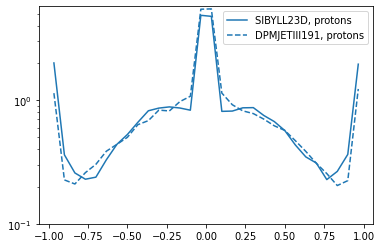

In [10]:
l=plt.plot(grid, m1_protons,label=m1 + ', protons')[0]
plt.plot(grid, m2_protons,c=l.get_color(), ls='--',label=m2 + ', protons')

plt.ylim(1e-1,)
plt.semilogy()
plt.legend()

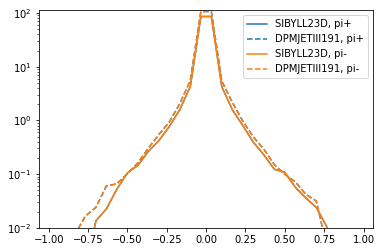

In [11]:
l=plt.plot(grid, m1_pions,label=m1 + ', pi+')[0]
plt.plot(grid, m2_pions,c=l.get_color(), ls='--',label=m2 + ', pi+')
l=plt.plot(grid, m1_pions,label=m1 + ', pi-')[0]
plt.plot(grid, m2_pions,c=l.get_color(), ls='--',label=m2 + ', pi-')

plt.ylim(1e-2,)
plt.semilogy()
plt.legend()

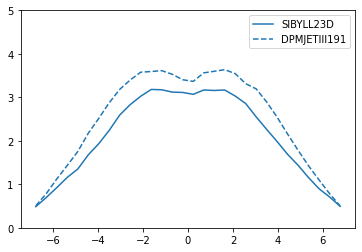

In [12]:
l=plt.plot(eta_grid, m1_charged_eta, label=m1)[0]
plt.plot(eta_grid, m2_charged_eta,c=l.get_color(), ls='--', label=m2)
plt.ylim(0,5)
plt.legend()

In [13]:
# Looking at event lists (change gen_m1 to gen_m2 for DPMJET)

for event in gen_m1.event_generator(event_kinematics, 3):
    event.filter_final_state_charged()
    print('Event {5:4}   {0:8} {1:10} {2:10} {3:10} {4:10}'.format('pid', 'px', 'py', 'pz', 'e', event.nevent))
    for ip, (pid, x, y, z, e) in enumerate(zip(event.p_ids, event.px, event.py, event.pz, event.en)):
        print('   {5:4}: {0:8} {1:10.2e} {2:10.2e} {3:10.2e} {4:10.2e}'.format(pid, x, y, z, e, ip))

Event 10000   pid      px         py         pz         e         
      0:      211  -5.85e-01   4.29e-01   3.18e+02   3.18e+02
      1:     -211   8.05e-02  -7.99e-01   3.82e+00   3.91e+00
      2:      321   9.50e-01  -6.50e-02   5.72e-01   1.22e+00
      3:      211  -1.45e-01  -2.24e-01   6.05e-01   6.76e-01
      4:     -321   7.88e-01  -8.03e-01  -6.18e+00   6.30e+00
      5:     -211   8.67e-01  -1.18e-01  -2.87e+01   2.88e+01
      6:      211  -6.46e-01  -3.14e-01  -1.37e+01   1.38e+01
      7:     -211  -1.26e-02   3.27e-01  -1.32e+01   1.32e+01
      8:      211  -5.19e-02   1.12e-01  -4.65e+01   4.65e+01
      9:      211   7.49e-02   2.69e-01   8.47e-01   9.03e-01
     10:     -211   4.57e-02   3.27e-01   1.16e+00   1.21e+00
     11:      211   3.07e-01  -3.07e-03   2.28e+00   2.30e+00
     12:     -211  -2.64e-01  -2.38e-01   9.34e-01   1.01e+00
     13:      211   1.06e-01  -4.86e-02  -3.51e-01   3.95e-01
     14:     -211  -4.45e-03   2.79e-01  -6.12e-01   6.87e-01
   